<a href="https://colab.research.google.com/github/Abs-CV/CV-Projects/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import histogram, cumulative_distribution, equalize_hist
from skimage import img_as_ubyte, img_as_uint

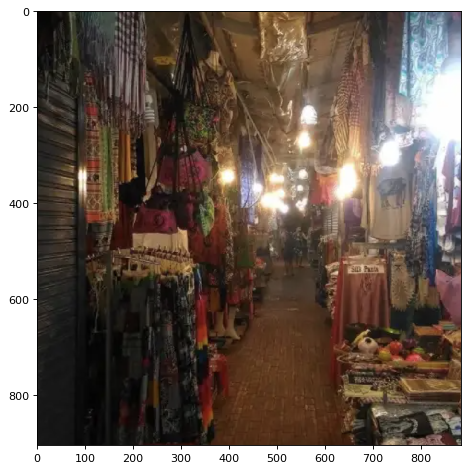

In [2]:
dark_image = imread('flea_market.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dark_image);

<ipython-input-3-71e056ba4370>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dark_image_grey = img_as_ubyte(rgb2gray(dark_image))
/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)


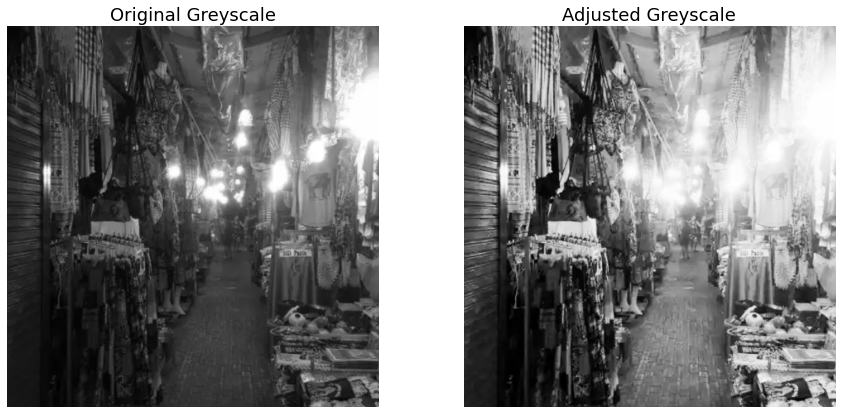

In [3]:
dark_image_grey = img_as_ubyte(rgb2gray(dark_image))
freq, bins = cumulative_distribution(dark_image_grey, nbins =256)
target_bins = np.arange(255)
target_freq = np.linspace(0, 1, len(target_bins))
interpolation = np.interp(freq, target_freq, target_bins)
dark_image_eq = img_as_ubyte(interpolation[dark_image_grey].astype(int))
freq_adj, bins_adj = cumulative_distribution(dark_image_eq)
    
    
fig, axes = plt.subplots(1, 2, figsize=(15,7));
axes[0].imshow(dark_image_grey, cmap = 'gray');
axes[0].set_title(f'Original Greyscale', fontsize = 18)
axes[1].imshow(dark_image_eq, cmap = 'gray');
axes[1].set_title(f'Adjusted Greyscale', fontsize = 18)
    
axes[0].axis('off');
axes[1].axis('off');

/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)
/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)
/usr/local/lib/python3.8/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)


array([[[  5,   4,   7],
        [  7,   4,   7],
        [  7,   6,  10],
        ...,
        [177, 175, 215],
        [173, 173, 214],
        [169, 172, 212]],

       [[  4,   3,   5],
        [  5,   4,   5],
        [  5,   4,   7],
        ...,
        [173, 173, 214],
        [169, 173, 213],
        [167, 173, 212]],

       [[  3,   3,   4],
        [  4,   3,   5],
        [  4,   4,   5],
        ...,
        [172, 173, 214],
        [169, 175, 214],
        [167, 176, 213]],

       ...,

       [[ 29,  40,  68],
        [ 29,  40,  68],
        [ 29,  40,  68],
        ...,
        [207, 217, 218],
        [204, 216, 218],
        [200, 214, 216]],

       [[ 29,  40,  68],
        [ 29,  40,  68],
        [ 27,  37,  63],
        ...,
        [215, 222, 222],
        [213, 222, 222],
        [212, 223, 222]],

       [[ 27,  37,  63],
        [ 27,  37,  63],
        [ 27,  37,  63],
        ...,
        [218, 224, 224],
        [220, 226, 225],
        [221, 227, 227]]

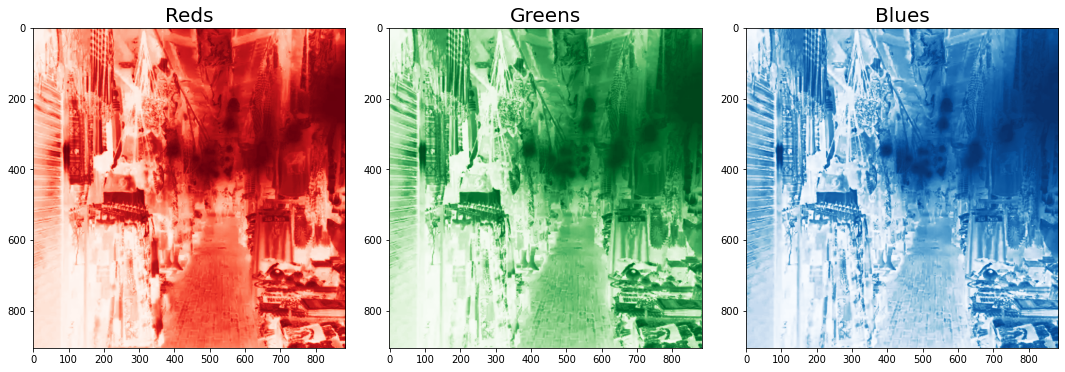

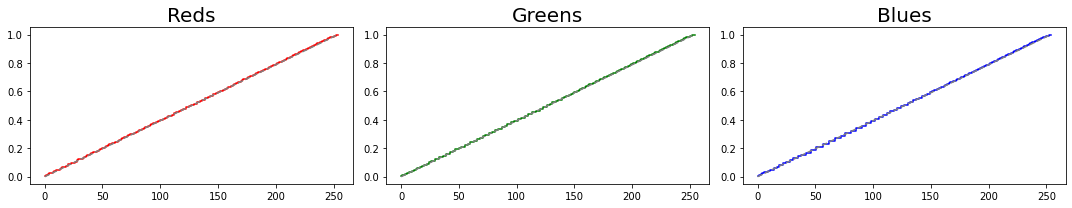

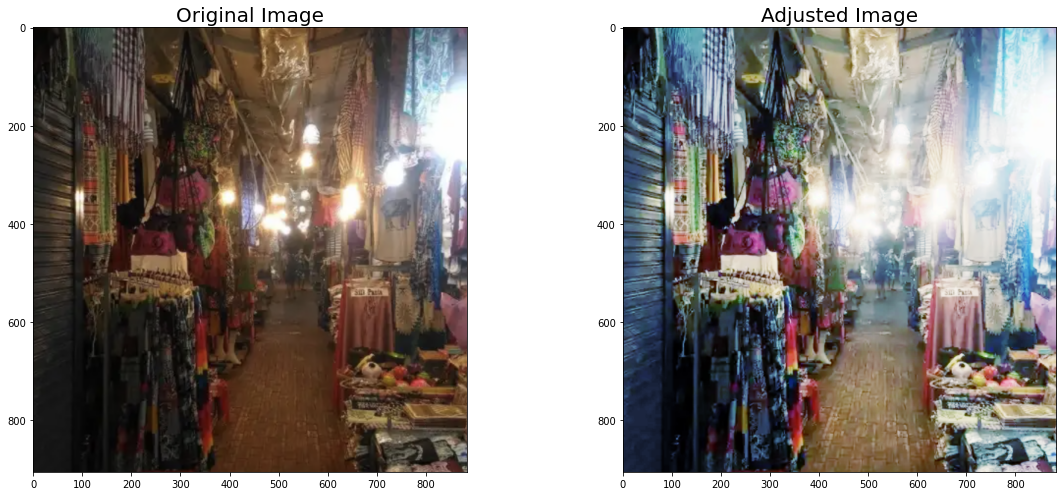

In [7]:
def rgb_adjuster_lin(image):
    
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    freq_bins = [cumulative_distribution(image[:,:,i]) for i in \
                 range(3)]
    names = ['Reds', 'Greens', 'Blues']
    line_color = ['red','green','blue']
    adjusted_figures = []
    f_size = 20
    
    #Pad frequencies with min frequency
    adj_freqs = []
    for i in range(len(freq_bins)):
        if len(freq_bins[i][0]) < 256:
            frequencies = list(freq_bins[i][0])
            min_pad = [min(frequencies)] * (256 - len(frequencies))
            frequencies = min_pad + frequencies
        else:
            frequencies = freq_bins[i][0]
        adj_freqs.append(np.array(frequencies))
    
    #Plot RGB Images
    fig, ax = plt.subplots(1,3, figsize=[15,5])
    for n, ax in enumerate(ax.flatten()):
        interpolation = np.interp(adj_freqs[n], target_freq, 
                        target_bins)
        adjusted_image = img_as_ubyte(interpolation[image[:,:,n]].astype(int))
        ax.set_title(f'{names[n]}', fontsize = f_size)
        ax.imshow(adjusted_image, cmap = names[n])
        adjusted_figures.append([adjusted_image])
    fig.tight_layout()
    #Plot Adjusted CDFs
    fig, ax = plt.subplots(1,3, figsize=[15,3])
    for n, ax in enumerate(ax.flatten()):
        interpolation = np.interp(adj_freqs[n], target_freq, 
                        target_bins)
        adjusted_image = img_as_ubyte(interpolation[image[:,:,n]]
                         .astype(int))
        freq_adj, bins_adj = cumulative_distribution(adjusted_image)
        
        ax.set_title(f'{names[n]}', fontsize = f_size)
        ax.step(bins_adj, freq_adj, c=line_color[n], 
                label='Actual CDF')
        ax.plot(target_bins, 
                target_freq, 
                c='gray', 
                label='Target CDF',
                linestyle = '--')
    fig.tight_layout()
    
    adjusted_image = np.dstack((adjusted_figures[0][0], 
                                adjusted_figures[1][0], 
                                adjusted_figures[2][0]))
    
    #Plot Original Image against Adjusted Image
    fig, ax = plt.subplots(1,2, figsize=[17,7])
    
    ax[0].imshow(image);
    ax[0].set_title(f'Original Image', fontsize = f_size)
    
    ax[1].imshow(adjusted_image);
    ax[1].set_title(f'Adjusted Image', fontsize = f_size)
    
    
    fig.tight_layout()
    
    return adjusted_image

rgb_adjuster_lin(dark_image)

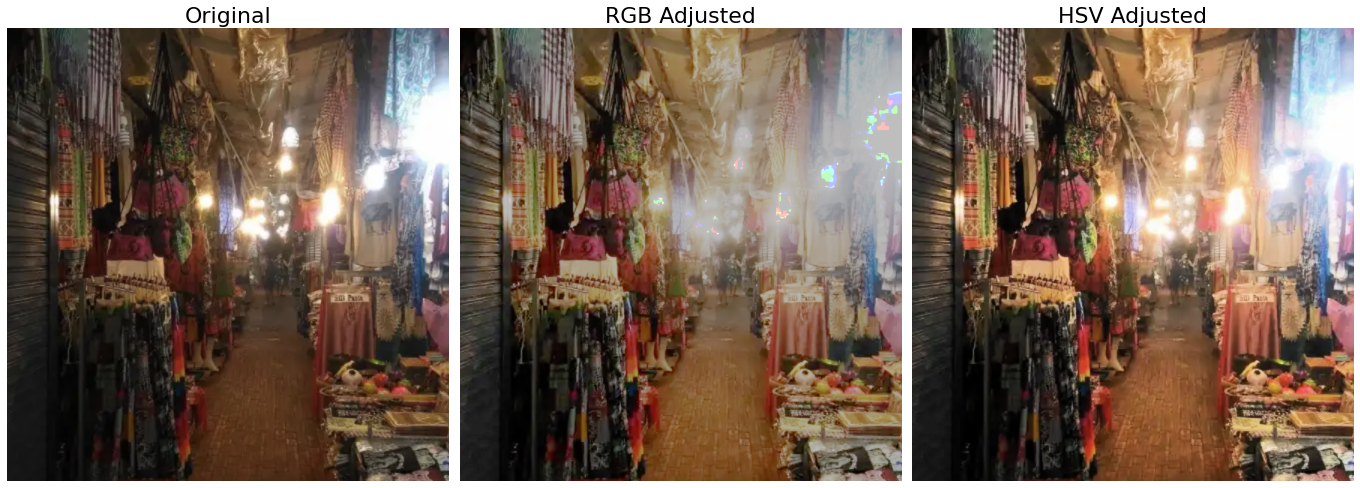

In [8]:
def rgb_vs_hsv(image):
    f_size = 22
    
    #Equalize Histogram
    rgb_adjusted = image.copy()
    rgb_adjusted = equalize_hist(rgb_adjusted)
  
    #HSV Adjustment
    new_image = color.rgb2hsv(image[:,:,:-1])
    new_image[:, :, 2] = equalize_hist(new_image [:, :, 2])
    hsv_adjusted = color.hsv2rgb(new_image)
    
    images = [image, rgb_adjusted, hsv_adjusted]
    names = ['Original', 'RGB Adjusted', 'HSV Adjusted']
    
    fig, ax = plt.subplots(1,3, figsize=[19,14])
    for n, ax in enumerate(ax.flatten()):
        ax.imshow(images[n])
        ax.set_title(f'{names[n]}', fontsize = f_size)
        ax.set_axis_off()
    
    fig.tight_layout()
    
rgb_vs_hsv(dark_image)